In [8]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

import hvplot.pandas
%matplotlib inline
import matplotlib.pyplot as plt
#import plotly.express as px
#pn.extension('plotly')
#import panel as pn
import os
from MCForecastTools import MCSimulation
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'hvplot'

In [ ]:
print(pd.__version__)

In [9]:
import pickle
meme_stock_df = pickle.load(open('meme_close.pkl', 'rb'))

meme_stock_df.head()

,AMC,GME,SPY
2021-01-04,2.0150,17.2400,368.85
2021-01-05,1.9853,17.3600,371.32
2021-01-06,2.0100,18.3900,373.53
2021-01-07,2.0500,18.1200,379.06
2021-01-08,2.1400,17.6899,381.24


In [10]:
meme_spy_returns = meme_stock_df.pct_change()
meme_spy_returns.head()

,AMC,GME,SPY
2021-01-04,NaN,NaN,NaN
2021-01-05,-0.014739,0.006961,0.006696
2021-01-06,0.012441,0.059332,0.005952
2021-01-07,0.019900,-0.014682,0.014805
2021-01-08,0.043902,-0.023736,0.005751


In [11]:
meme_spy_returns.dropna(inplace=True)
meme_spy_returns.head()

,AMC,GME,SPY
2021-01-05,-0.014739,0.006961,0.006696
2021-01-06,0.012441,0.059332,0.005952
2021-01-07,0.019900,-0.014682,0.014805
2021-01-08,0.043902,-0.023736,0.005751
2021-01-11,0.028037,0.126632,-0.006558


Text(0.5, 1.0, 'Daily Returns AMC GME S&P 500')

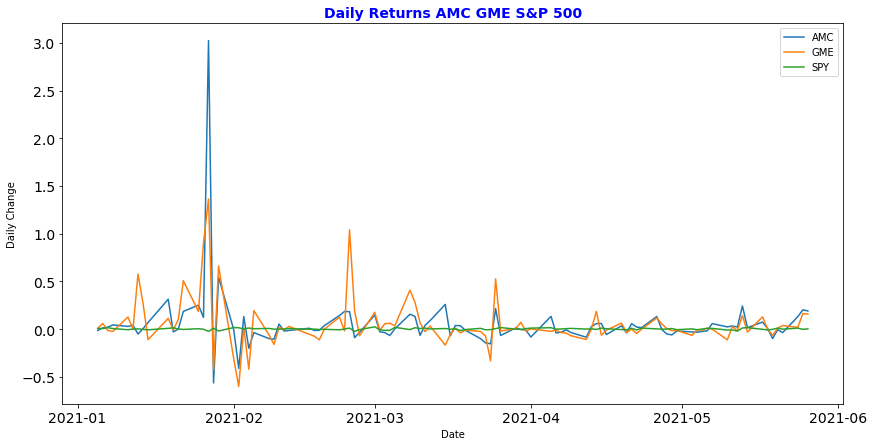

In [15]:
meme_stock_plot=meme_spy_returns.plot(title='AMC and GME vs S&P 500',ylabel="Daily Change",xlabel="Date", fontsize=14,figsize=(14,7))

meme_stock_plot = meme_stock_plot.set_title('Daily Returns AMC GME S&P 500', fontsize=14, fontweight="bold", color="blue") 

meme_stock_plot

In [17]:
meme_stock_plot.figure.savefig('meme_stock_plot.png')

Text(0.5, 1.0, 'Cumulative Returns')

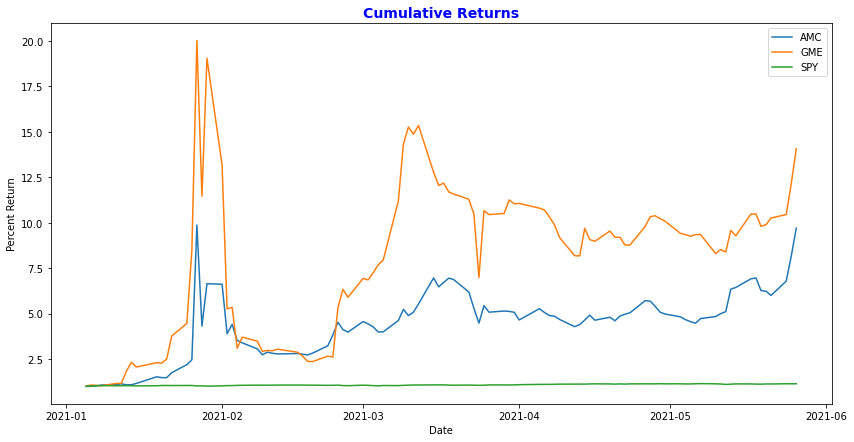

In [18]:
cumulative_returns = (1 + meme_spy_returns).cumprod()
cumulative_returns_plot=cumulative_returns.plot(figsize=(14, 7), xlabel="Date", ylabel="Percent Return")
cumulative_returns_plot = cumulative_returns_plot.set_title('Cumulative Returns', fontsize=14, fontweight="bold", color="blue") 
cumulative_returns_plot

In [20]:
cumulative_returns_plot.figure.savefig('PNG/cumulative_returns_plot.png')

Text(0.5, 1.0, 'Risk Comparison')

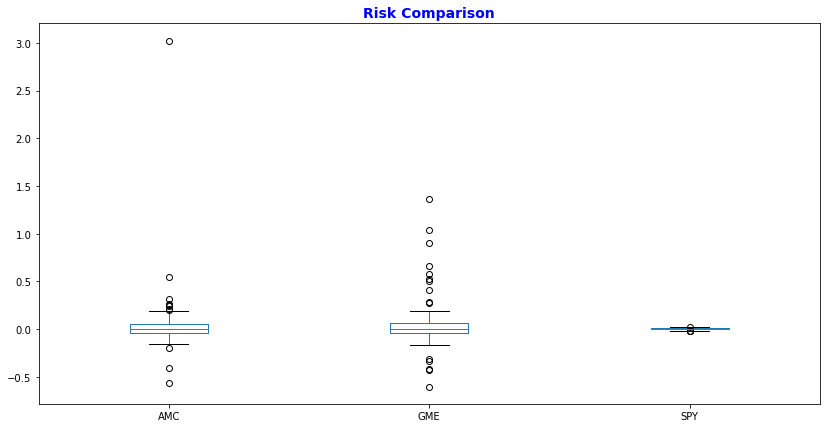

In [21]:
risk_plot=meme_spy_returns.plot.box(figsize=(14, 7))
risk_plot = risk_plot.set_title('Risk Comparison', fontsize=14, fontweight="bold", color="blue") 
risk_plot

In [22]:
risk_plot.figure.savefig('PNG/risk_plot.png')

In [9]:
meme_spy_returns.std()

AMC    0.329059
GME    0.258435
SPY    0.009030
dtype: float64

In [10]:
anual_std = meme_spy_returns.std() * np.sqrt(252)
anual_std

AMC    5.223645
GME    4.102531
SPY    0.143349
dtype: float64

In [24]:
sharpe_ratios = (meme_spy_returns.mean() * 252) / (meme_spy_returns.std() * np.sqrt(252))
sharpe_ratios

AMC    2.351388
GME    3.286217
SPY    2.337867
dtype: float64

Text(0.5, 1.0, 'Sharpe Ratios')

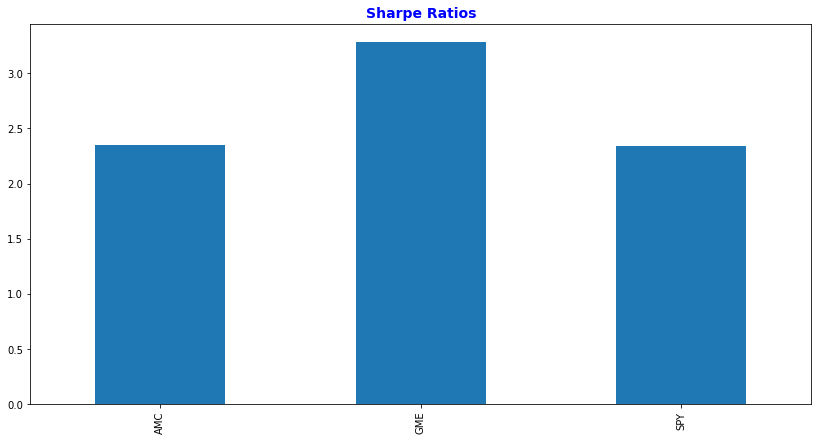

In [25]:
sharpe_ratios_plot = sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(14,7))
sharpe_ratios_plot = sharpe_ratios_plot.set_title('Sharpe Ratios', fontsize=14, fontweight="bold", color="blue")
sharpe_ratios_plot

In [26]:
sharpe_ratios_plot.figure.savefig('PNG/sharpe_ratios_plot.png')

In [1]:
import pickle
btc = pickle.load(open('btc.pkl', 'rb'))
doge = pickle.load(open('doge.pkl', 'rb'))
meme_close = pickle.load(open('meme_close.pkl', 'rb'))
#concat_stocks_and_cryptos

In [2]:
meme_close.head()

RecursionError: maximum recursion depth exceeded

In [30]:
import pandas as pd
concat_stocks_and_cryptos = pd.DataFrame()
concat_stocks_and_cryptos = pd.concat([btc, doge, meme_close], join='inner', axis='columns')
concat_stocks_and_cryptos.head()

,close,close,AMC,GME,SPY
2021-01-04,32005.88,0.009792,2.0150,17.2400,368.85
2021-01-05,34039.05,0.010000,1.9853,17.3600,371.32
2021-01-06,36859.26,0.010458,2.0100,18.3900,373.53
2021-01-07,39505.56,0.009768,2.0500,18.1200,379.06
2021-01-08,40667.07,0.009794,2.1400,17.6899,381.24


In [31]:
concat_stocks_and_cryptos = concat_stocks_and_cryptos.set_axis(['Bitcoin', 'Dogecoin', 'AMC', 'GME', 'SPY'], axis=1)
concat_stocks_and_cryptos

,Bitcoin,Dogecoin,AMC,GME,SPY
2021-01-04,32005.88,0.009792,2.0150,17.2400,368.8500
2021-01-05,34039.05,0.010000,1.9853,17.3600,371.3200
2021-01-06,36859.26,0.010458,2.0100,18.3900,373.5300
2021-01-07,39505.56,0.009768,2.0500,18.1200,379.0600
2021-01-08,40667.07,0.009794,2.1400,17.6899,381.2400
...,...,...,...,...,...
2021-04-05,59120.00,0.059883,10.6108,186.1239,406.3000
2021-04-06,58019.98,0.064358,10.1891,184.4000,406.0600
2021-04-07,55955.75,0.058705,9.8500,177.7300,406.5711
2021-04-08,58083.10,0.061903,9.7800,170.2400,408.4900


In [32]:
import hvplot.pandas
cum_concat_stocks_and_cryptos = concat_stocks_and_cryptos.pct_change()
cum_concat_stocks_and_cryptos.head()

ModuleNotFoundError: No module named 'hvplot'

In [27]:
cum_concat_stocks_and_cryptos.hvplot(width=700, height=400, title="Cumulative Returns Meme Stocks and Cryptos")

NameError: name 'cum_concat_stocks_and_cryptos' is not defined

In [19]:
import requests
import pandas as pd
import datetime as dt
import praw

In [20]:
reddit = praw.Reddit(client_id = 's46cB0O1CjDLeg',
                    client_secret = 'OnU58KhDJdZzqgdpaDLfsSQ723PG9w',
                    password = '?xkk5^H,Q_ZaF+m',
                    user_agent = 'Personal use for keyword analysis.',
                    username = 'crownds18')

In [21]:
subreddit = reddit.subreddit('Wallstreetbets')

In [22]:
wsb_subreddit = subreddit.top()

In [23]:
wsb_subreddit = subreddit.top(limit=100000)

In [24]:
for submission in subreddit.top(limit=100000):
    print(submission.title, submission.id)

Times Square right now l8rf4k
UPVOTE so everyone sees we got SUPPORT l6wu59
GME YOLO update — Jan 28 2021 l78uct
GME YOLO month-end update — Jan 2021 l846a1
It’s treason then l881ia
CLASS ACTION AGAINST ROBINHOOD. Allowing people to only sell is the definition of market manipulation. A class action must be started, Robinhood has made plenty of money off selling info about our trades to the hedge funds to be able to pay out a little for causing people to loose money now l6x130
GME YOLO update — Feb 19 2021 lnqgz8
GME YOLO update — Jan 27 2021 --------------------------------------- guess i need 102 characters in title now l6ekdz
GME YOLO update — Feb 1 2021 lae6j0
Used some of my GME tendies to buy Nintendo Switches from Gamestop, then donated them to a Children's Hospital. Got featured on the local news and brought glory to WSB. l8c0u4
IT'S POWER TO THE TRADERS NOW l7feld
Wow super bowl commercial for us lexy8t
Can we all take a moment and appreciate the Mods who have grinded through t

In [25]:
topics_headers = { "title":[],
                "created": [], 
                "body":[]}

In [26]:
for submission in wsb_subreddit:
    topics_headers["title"].append(submission.title)
    topics_headers["created"].append(submission.created)
    topics_headers["body"].append(submission.selftext)

In [27]:
wsb_data = pd.DataFrame(topics_headers)
wsb_data.head()

,title,created,body
0,Times Square right now,1.612058e+09,
1,UPVOTE so everyone sees we got SUPPORT,1.611870e+09,
2,GME YOLO update — Jan 28 2021,1.611897e+09,
3,GME YOLO month-end update — Jan 2021,1.611983e+09,
4,It’s treason then,1.611992e+09,


In [28]:
def get_date(created):
    return dt.datetime.fromtimestamp(created)

In [29]:
wsb_datetime = wsb_data["created"].apply(get_date)

In [30]:
wallstreetbets_data = wsb_data.assign(timestamp = wsb_datetime)

In [31]:
wallstreetbets_data

,title,created,body,timestamp
0,Times Square right now,1.612058e+09,,2021-01-30 19:00:38
1,UPVOTE so everyone sees we got SUPPORT,1.611870e+09,,2021-01-28 14:40:34
2,GME YOLO update — Jan 28 2021,1.611897e+09,,2021-01-28 22:06:23
3,GME YOLO month-end update — Jan 2021,1.611983e+09,,2021-01-29 22:04:45
4,It’s treason then,1.611992e+09,,2021-01-30 00:40:59
...,...,...,...,...
964,WALLSTREETBETS VS WALLSTREET: SHORT SQUEEZE RO...,1.614325e+09,,2021-02-26 00:40:53
965,"My SURGEON Is On WSB, And Basically Just Calle...",1.602556e+09,"So, I come in today for a consultation about g...",2020-10-12 19:21:26
966,"Me, a long time lurker who suddenly YOLO’d on ...",1.614776e+09,,2021-03-03 05:48:24
967,Jokes on them. Red is my favorite color,1.612222e+09,,2021-02-01 16:32:12


In [32]:
wallstreetbets_data.set_index("timestamp")

,title,created,body
timestamp,,,
2021-01-30 19:00:38,Times Square right now,1.612058e+09,
2021-01-28 14:40:34,UPVOTE so everyone sees we got SUPPORT,1.611870e+09,
2021-01-28 22:06:23,GME YOLO update — Jan 28 2021,1.611897e+09,
2021-01-29 22:04:45,GME YOLO month-end update — Jan 2021,1.611983e+09,
2021-01-30 00:40:59,It’s treason then,1.611992e+09,
...,...,...,...
2021-02-26 00:40:53,WALLSTREETBETS VS WALLSTREET: SHORT SQUEEZE RO...,1.614325e+09,
2020-10-12 19:21:26,"My SURGEON Is On WSB, And Basically Just Calle...",1.602556e+09,"So, I come in today for a consultation about g..."
2021-03-03 05:48:24,"Me, a long time lurker who suddenly YOLO’d on ...",1.614776e+09,


In [34]:
wallstreetbets_data['timestamp'] = pd.to_datetime(wallstreetbets_data['timestamp'], utc=True)

wallstreetbets_data.set_index('timestamp', inplace=True)
wallstreetbets_data.index = wallstreetbets_data.index.date

In [35]:
wallstreetbets_data

,title,created,body
2021-01-30,Times Square right now,1.612058e+09,
2021-01-28,UPVOTE so everyone sees we got SUPPORT,1.611870e+09,
2021-01-28,GME YOLO update — Jan 28 2021,1.611897e+09,
2021-01-29,GME YOLO month-end update — Jan 2021,1.611983e+09,
2021-01-30,It’s treason then,1.611992e+09,
...,...,...,...
2021-02-26,WALLSTREETBETS VS WALLSTREET: SHORT SQUEEZE RO...,1.614325e+09,
2020-10-12,"My SURGEON Is On WSB, And Basically Just Calle...",1.602556e+09,"So, I come in today for a consultation about g..."
2021-03-03,"Me, a long time lurker who suddenly YOLO’d on ...",1.614776e+09,
2021-02-01,Jokes on them. Red is my favorite color,1.612222e+09,


In [36]:
wallstreetbets_data.drop(columns = ['created', 'body'], inplace = True)
wallstreetbets_data

,title
2021-01-30,Times Square right now
2021-01-28,UPVOTE so everyone sees we got SUPPORT
2021-01-28,GME YOLO update — Jan 28 2021
2021-01-29,GME YOLO month-end update — Jan 2021
2021-01-30,It’s treason then
...,...
2021-02-26,WALLSTREETBETS VS WALLSTREET: SHORT SQUEEZE RO...
2020-10-12,"My SURGEON Is On WSB, And Basically Just Calle..."
2021-03-03,"Me, a long time lurker who suddenly YOLO’d on ..."
2021-02-01,Jokes on them. Red is my favorite color


In [37]:
wallstreetbets_data.to_csv('WallStreetBets.csv', index=False)

In [38]:
mylist = ['GME', 'GameStop', 'AMC']
pattern = '|'.join(mylist)

pattern
'GME | GameStop | AMC'

wallstreetbets_data['mentions'] = wallstreetbets_data.title.str.contains(pattern)
wallstreetbets_data

,title,mentions
2021-01-30,Times Square right now,False
2021-01-28,UPVOTE so everyone sees we got SUPPORT,False
2021-01-28,GME YOLO update — Jan 28 2021,True
2021-01-29,GME YOLO month-end update — Jan 2021,True
2021-01-30,It’s treason then,False
...,...,...
2021-02-26,WALLSTREETBETS VS WALLSTREET: SHORT SQUEEZE RO...,False
2020-10-12,"My SURGEON Is On WSB, And Basically Just Calle...",False
2021-03-03,"Me, a long time lurker who suddenly YOLO’d on ...",True
2021-02-01,Jokes on them. Red is my favorite color,False


In [39]:
wallstreetbets_mentions = wallstreetbets_data.groupby(wallstreetbets_data.index)['mentions'].sum()
wallstreetbets_mentions

2017-01-31    0
2018-02-08    0
2018-03-14    0
2018-04-17    0
2018-06-03    0
             ..
2021-06-01    1
2021-06-02    1
2021-06-03    1
2021-06-04    1
2021-06-05    0
Name: mentions, Length: 221, dtype: int64

In [40]:
wallstreetbets_mentions.to_frame()

,mentions
2017-01-31,0
2018-02-08,0
2018-03-14,0
2018-04-17,0
2018-06-03,0
...,...
2021-06-01,1
2021-06-02,1
2021-06-03,1
2021-06-04,1


In [41]:
wallstreetbets_mentions.index.isnull().sum()

0

In [42]:
wallstreetbets_mentions_plot = wallstreetbets_mentions
wallstreetbets_mentions_plot.index = pd.to_datetime(wallstreetbets_mentions_plot.index)
wallstreetbets_mentions_plot = wallstreetbets_mentions_plot.loc['2021-01-01':]

In [43]:
wallstreetbets_mentions_plot.index.dtype

dtype('<M8[ns]')

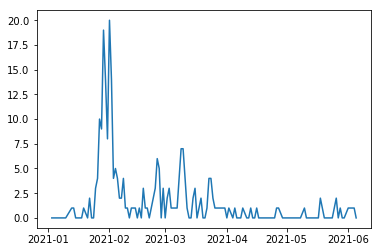

In [44]:
import matplotlib.pyplot as plt
plt.plot(wallstreetbets_mentions_plot[wallstreetbets_mentions_plot.index])